In [ ]:
# import library
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
import warnings 

warnings.filterwarnings("ignore")

In [ ]:
# 2. load the dataset
df1 = pd.read_csv("C:\\Users\\shriya pathak\\OneDrive\\Desktop\\pw project\\notebooks\\Data\\coin_gecko_2022-03-16.csv" )
df2 = pd.read_csv("C:\\Users\\shriya pathak\\OneDrive\\Desktop\\pw project\\notebooks\\Data\\coin_gecko_2022-03-17.csv" )



In [71]:
# 3. Combine the datasets
df = pd.concat([df1, df2], ignore_index=True)


In [50]:
# 4. Check the shape and first few rows
print("Combined shape:", df.shape)
df.head()


Combined shape: (1000, 9)


,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [51]:
# 5. Data Info
print("\nData Info:")
print(df.info())



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          993 non-null    float64
 4   24h         993 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  993 non-null    float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 70.4+ KB
None


In [52]:
# 6. Missing values
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64


In [53]:
# 7. Describe numerical columns
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
              price          1h         24h          7d    24h_volume  \
count  1.000000e+03  993.000000  993.000000  992.000000  9.930000e+02   
mean   6.561060e+02    0.009723    0.023737    0.023558  2.893109e+08   
std    4.584655e+03    0.026934    0.059303    0.229781  2.769908e+09   
min    1.484000e-09   -0.704000   -0.646000   -0.558000  0.000000e+00   
25%    1.940547e-01    0.001000    0.001000   -0.041000  1.766976e+06   
50%    1.095000e+00    0.006000    0.016000   -0.000500  8.343005e+06   
75%    7.232500e+00    0.019000    0.035000    0.037000  4.003652e+07   
max    4.121727e+04    0.095000    0.577000    4.608000  5.793497e+10   

            mkt_cap  
count  1.000000e+03  
mean   3.755304e+09  
std    3.803783e+10  
min    6.577043e+07  
25%    1.157776e+08  
50%    2.120036e+08  
75%    5.948436e+08  
max    7.760774e+11  


In [54]:
# 8. Correlation matrix (optional but helpful for feature selection later)
print("\nCorrelation Matrix:")
print(df.corr(numeric_only=True))



Correlation Matrix:
               price        1h       24h        7d  24h_volume   mkt_cap
price       1.000000  0.001832 -0.005455  0.016843    0.184038  0.366709
1h          0.001832  1.000000  0.436889  0.132341   -0.006421  0.003880
24h        -0.005455  0.436889  1.000000  0.479752   -0.009329 -0.007842
7d          0.016843  0.132341  0.479752  1.000000    0.015566 -0.001126
24h_volume  0.184038 -0.006421 -0.009329  0.015566    1.000000  0.599778
mkt_cap     0.366709  0.003880 -0.007842 -0.001126    0.599778  1.000000


In [ ]:
# 9. Drop or fill missing values
df_cleaned = df.dropna()  


In [56]:
# 10. Save the cleaned data
df_cleaned.to_csv("cleaned_data.csv", index=False)
print("Cleaned data saved as 'cleaned_data.csv'")

Cleaned data saved as 'cleaned_data.csv'


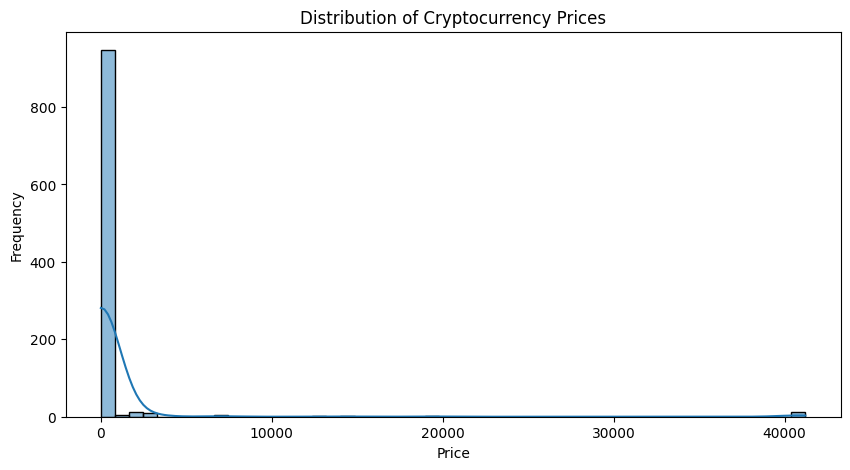

In [57]:
# 1. Distribution of Price
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title("Distribution of Cryptocurrency Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


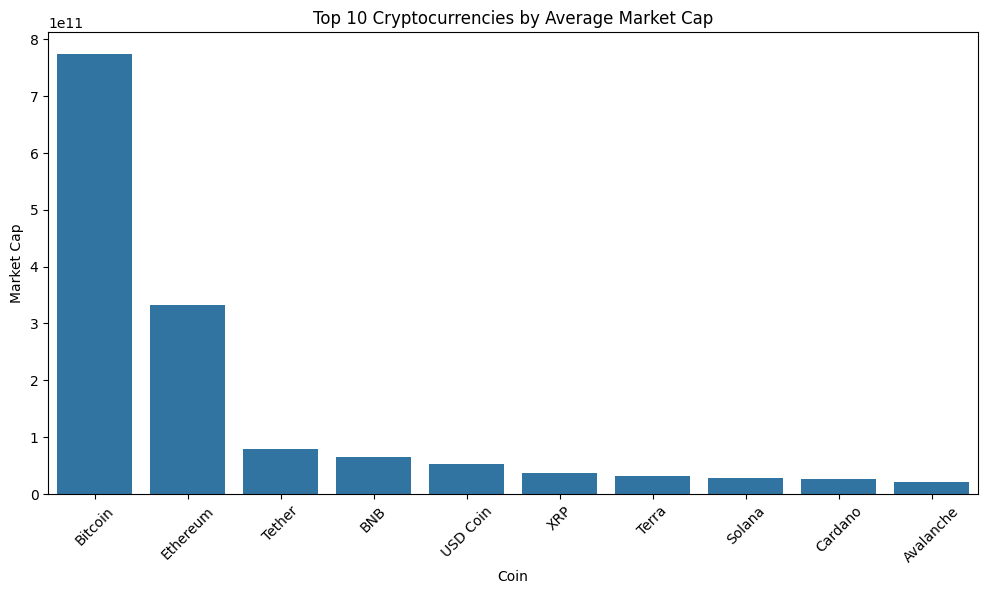

In [58]:
# 2. Top 10 Coins by Market Cap
top10_mktcap = df_cleaned.groupby('coin')['mkt_cap'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10_mktcap.index, y=top10_mktcap.values)
plt.title("Top 10 Cryptocurrencies by Average Market Cap")
plt.ylabel("Market Cap")
plt.xlabel("Coin")
plt.xticks(rotation=45)
plt.show()


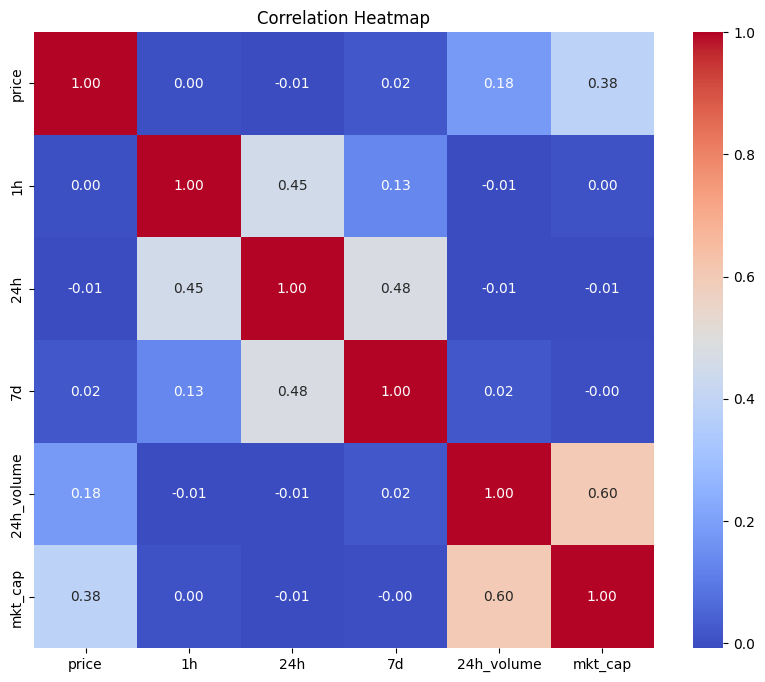

In [59]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df_cleaned[['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


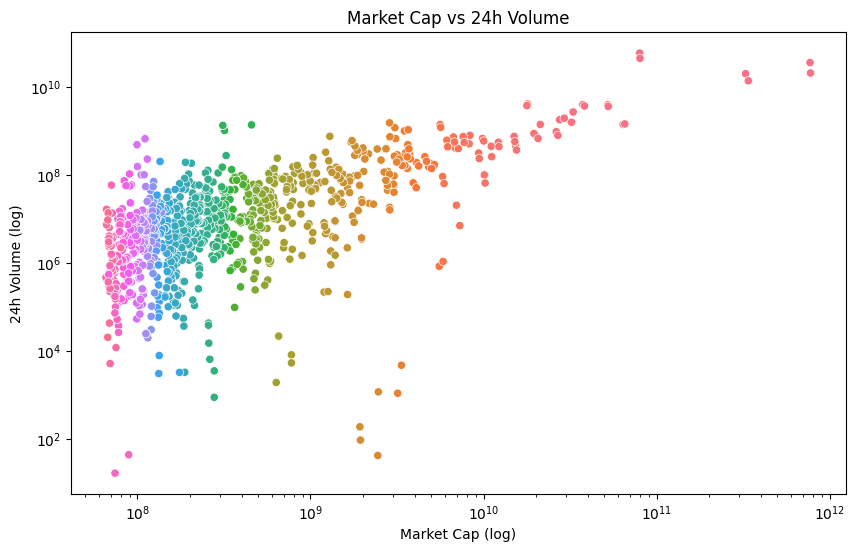

In [61]:
# 4. Volume vs Market Cap
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='mkt_cap', y='24h_volume', hue='coin', legend=False)
plt.xscale('log')
plt.yscale('log')
plt.title("Market Cap vs 24h Volume")
plt.xlabel("Market Cap (log)")
plt.ylabel("24h Volume (log)")
plt.show()